In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.mlab import griddata
from datetime import datetime
from scipy import stats


In [3]:
capT = 1000
Input_H = [1500,0,0,0]
parameters = [Input_H, capT] 

β = 0.1
μ1 = 1/21 #14 days infectious
μ2 = 1/5 #5 days (14 - 9 days)
σ =1/5 #5 days exposed
ϵ = 0.00001


In [4]:
def gillespieSEIR_season(initial, beta, mu1,mu2, sigma,epsilon):
    event_time = []
    pop = []
    N = sum(initial)
    pop.append(initial)
    event_time.append(0)
    times = 0
    ind = 0
    year = 1
    cuminf = []
    cuminf.append(0)
    events = []
    num_external= 0
    num_internal = 0
    Rtotal = 1
    while Rtotal>0:
#         print(Rtotal)
        state = np.zeros(shape= (4,12))
        
        ############################### Seasonality #######################################
        if np.round(times)%365 <= 120:
            E = epsilon
        else:
            E = 0
        ####################################################################################
        #################################### EVENTS ########################################
        ####################################################################################    
        
        R_external = E*pop[ind][0]
        state[:,0] = [-1,1,0,0]
        
        R_se = beta*(pop[ind][0])*(pop[ind][2])/N  
        state[:,1] = [-1, 1, 0, 0]
        
        R_ei = sigma*pop[ind][1]
        state[:,2] = [0, -1, 1, 0]
        

        
        R_ir = mu2*pop[ind][2]
        state[:,3] = [0,0,-1,1]
        

        R_is = mu1*pop[ind][2]
        state[:,4] = [1,0,-1,0]
        

########################## RATES ##############################
        rate = [R_external, R_se, R_ei,  R_ir,  R_is]
#                 , R_sb, R_sd, R_ed, R_id]

        Rtotal = sum(rate)

        delta_t= -np.log(np.random.uniform(0,1))/Rtotal
        P = np.random.uniform(0,1)*Rtotal
        
        if Rtotal>0:
            times =times+ delta_t
            event = np.min(np.where(P<=np.cumsum(rate)))
            events.append(event)
            event_time.append(times)
            pop.append(pop[ind]+state[:,event])
#             print(cuminf)
            if event == 0:
                num_external +=1
            if event == 1:
                num_internal +=1
            if event == 2:
                cuminf.append(1 +cuminf[ind] )
            else:
                cuminf.append(0 +cuminf[ind])
            ind=ind+1
#         print(pop[ind])
        N = sum(pop[ind][:2])
    return event_time, np.array(pop), events, cuminf, num_external, num_internal

In [5]:
Input_H = [1500, 0, 0, 0]
Input_H[:3]
Gh_season = gillespieSEIR_season(Input_H, β, μ1, μ2, σ, ϵ)
SEIHRt_s = Gh_season[0]
SEIHRs_s = Gh_season[1][:,0]
SEIHRe_s = Gh_season[1][:,1]
SEIHRi_s = Gh_season[1][:,2]
# SEIHRh_s = Gh_season[1][:,3]
SEIHRr_s = Gh_season[1][:,3]

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


In [6]:
Gh_season[5]/Gh_season[3][-1]

0.4

In [7]:
manhes = []
manhts = []
manhhs = []
manhis = []
manhss = []
manhrs = []
cuminf = []
# manhts.append((0,0))
for ind, x in enumerate(SEIHRt_s):
#     ind = ind +1
    if ind<len(SEIHRt_s)-1:
        manhes.append((SEIHRe_s[ind], SEIHRe_s[ind]))
#         manhhs.append((SEIHRh_s[ind], SEIHRh_s[ind]))
        manhis.append((SEIHRi_s[ind], SEIHRi_s[ind]))
        manhss.append((SEIHRs_s[ind], SEIHRs_s[ind]))
        manhrs.append((SEIHRr_s[ind], SEIHRr_s[ind]))
        manhts.append((SEIHRt_s[ind], SEIHRt_s[ind+1]))
        cuminf.append((Gh_season[3][ind], Gh_season[3][ind]))

    else:
        manhes.append((SEIHRe_s[ind], SEIHRe_s[ind]))
#         manhhs.append((SEIHRh_s[ind], SEIHRh_s[ind]))
        manhis.append((SEIHRi_s[ind], SEIHRi_s[ind]))
        manhss.append((SEIHRs_s[ind], SEIHRs_s[ind]))
        manhrs.append((SEIHRr_s[ind], SEIHRr_s[ind]))
        manhts.append((SEIHRt_s[ind], SEIHRt_s[ind]))
        cuminf.append((Gh_season[3][ind], Gh_season[3][ind]))


manhes = np.array(manhes).flatten()
manhts = np.array(manhts).flatten()
manhss = np.array(manhss).flatten()
manhrs = np.array(manhrs).flatten()
cuminf = np.array(cuminf).flatten()
manhis = np.array(manhis).flatten()
# manhts = np.insert(manhts, -1, manhts[-1])
# manhts = np.insert(manhts, 0, manhts[0])
# manhts

In [8]:
manhts

array([  0.        ,  26.04926447,  26.04926447,  26.20690915,
        26.20690915,  26.21499616,  26.21499616,  29.50110565,
        29.50110565,  30.01664498,  30.01664498,  34.93481327,
        34.93481327,  37.27796024,  37.27796024,  37.28582513,
        37.28582513,  56.24854941,  56.24854941, 206.96689464,
       206.96689464, 210.19243436, 210.19243436, 215.09387302,
       215.09387302, 215.32491217, 215.32491217, 222.14587704,
       222.14587704, 225.89238605, 225.89238605, 225.89238605])

([<matplotlib.axis.XTick at 0x7f7a174c8780>,
 <a list of 5 Text xticklabel objects>)

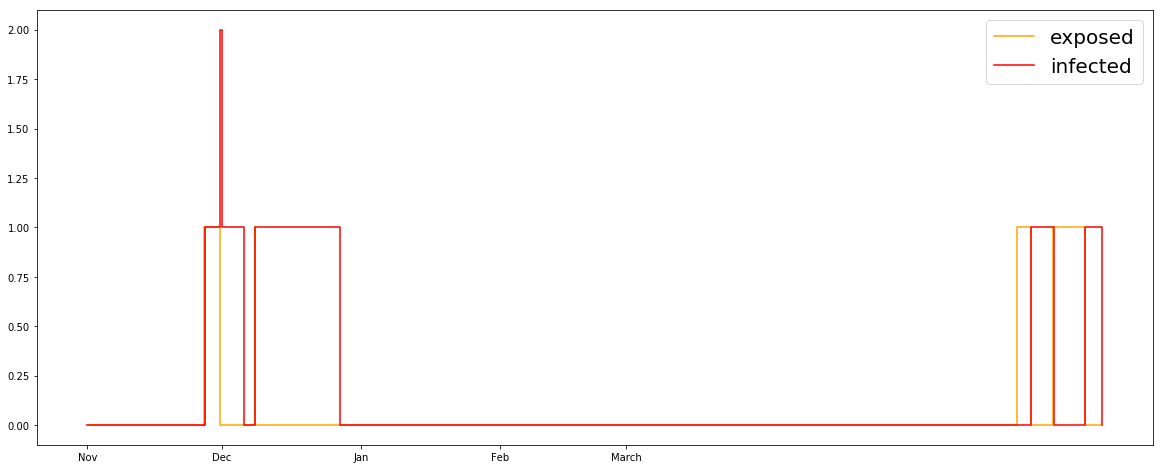

In [9]:
N = sum(Input_H)
plt.figure(figsize = (20,8))
# plt.plot(SEIHRt, SEIHRr/Nn,c='blue', label = 'removed')
plt.plot(manhts, manhes,c='orange', label = 'exposed')
# plt.plot(manhts, manhhs/Nn,c='magenta', label = 'hospital')

# plt.plot(manhts,manhrs/Nn, c='yellowgreen',label = 'susceptible')
plt.plot(manhts,manhis,c= 'r', label = 'infected')
plt.legend(fontsize = 20)
# plt.xlim([120,150])
plt.xticks([0,30, 30+31, 30+31+31, 30+31+31+28
           ], ['Nov','Dec', 'Jan', 'Feb', 'March'])

([<matplotlib.axis.XTick at 0x7f7a151376a0>,
 <a list of 5 Text xticklabel objects>)

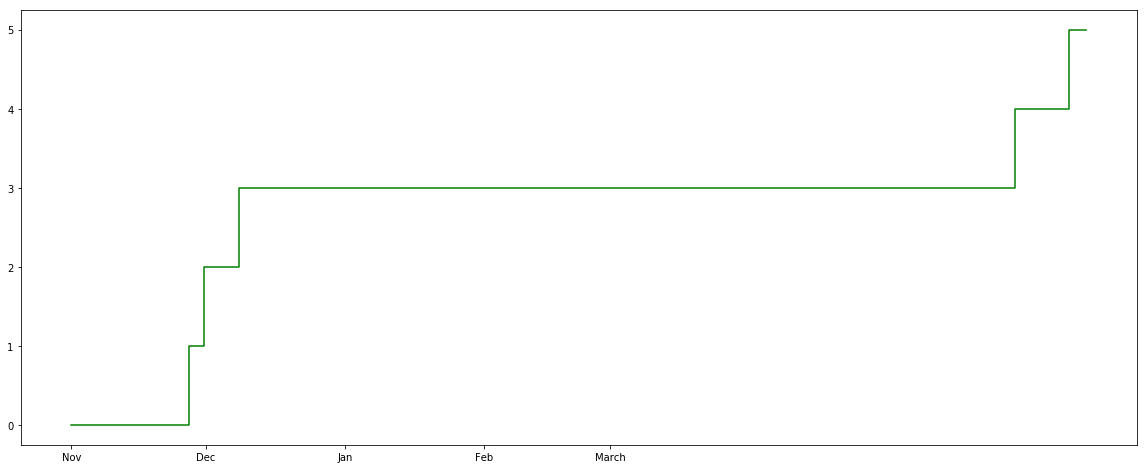

In [10]:
plt.figure(figsize = (20,8))
plt.plot(manhts, cuminf, color = 'green')
plt.xticks([0,30, 30+31, 30+31+31, 30+31+31+28
           ], ['Nov','Dec', 'Jan', 'Feb', 'March'])

# Perform ABC on 2004 data

In [175]:
Data_F04=pd.read_csv("../../Case_data/2004_F_cases.csv",sep = ',', header = 0)
############################# Spacing ##############################################
date_format = "%d/%m/%y"


def Spacing(dataset):
    record = []
    record.append(datetime.strptime(dataset['Date'][0], date_format).day)
    for i in range(1, len(dataset)):
        record.append(record[i-1]+(datetime.strptime(dataset['Date'][i], date_format)-datetime.strptime(dataset['Date'][i-1], date_format)).days)
    start_day = (datetime.strptime(Data_F04['Date'].values[0], date_format)-datetime.strptime('01/11/03', date_format)).days
    record = [int(a - record[0]) for a in record]
    record = [int(a +start_day) for a in record]

    return record

Rec_F04=Spacing(Data_F04)
Cum_F04 = Data_F04['CumsumInf'].values
leng = len(np.arange(0, Rec_F04[0], 1))
Rec_F04 = np.insert(Rec_F04, 0, np.arange(0, Rec_F04[0], 1))
Cum_F04 = np.insert(Cum_F04, 0, np.zeros(leng))
summary = np.array([Rec_F04, Cum_F04])



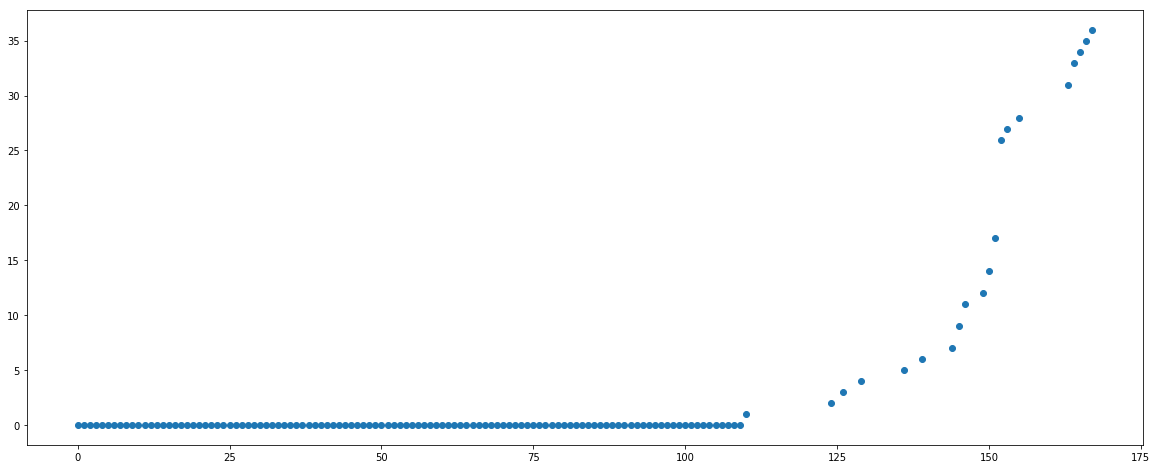

In [176]:
plt.figure(figsize = (20,8))
plt.plot(Rec_F04, Cum_F04, 'o')


# Initial Tolerance 

In [249]:
capT = 1000
Input_H = [1500,0,0,0]
parameters = [Input_H, capT] 

β = 0.4
μ1 = 1/21 #14 days infectious
μ2 = 1/5 #5 days (14 - 9 days)
σ =1/8 #5 days exposed
ϵ = 0.000003

In [264]:

M =gillespieSEIR_season(Input_H, β, μ1, μ2, σ, ϵ)
time = [] #make results of M a step function
cuminf = [] #steps
infections = []
for ind, x in enumerate(M[0]):
    if ind < len(M[0])-1:
        time.append((M[0][ind], M[0][ind+1]))
        cuminf.append((M[3][ind], M[3][ind]))
        infections.append((M[1][:,2][ind], M[1][:,2][ind]))
    else:
        time.append((M[0][ind], M[0][ind]))
        cuminf.append((M[3][ind], M[3][ind]))
        infections.append((M[1][:,2][ind], M[1][:,2][ind]))

time2 = np.array(time).flatten()
time = np.array(time).flatten()

cuminf = np.array(cuminf).flatten()
max_inf = max(cuminf)
max_time = math.ceil(max(time))
#     print(max_inf, max_time, βt, ɛt)


summary_time = summary[0]
#         print(summary_time, max(summary_time[0]), max_time)
summary_cum = summary[1]
if max_time> max(summary_time):
    length1 =  np.arange(max(summary_time), max_time +1, 2)
    summary_time = np.append(summary_time, length1)
#         print(summary_time, len( length1))
    summary_cum = np.append(summary_cum, max(summary[1])*np.ones(len(length1 )))
#         print(summary_cum)
if max_time < max(summary_time):
    length2 = np.arange(max_time, max(summary_time)+1, 2)
    time = np.append(time,length2)
    cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))

inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
inter_cum = np.interp(inter_t, time,cuminf) #daily steps

print(np.linalg.norm(summary_cum-inter_cum[summary_time]))

75.8946638440411


/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


In [265]:
print(M[4], M[5])

1 11


([<matplotlib.axis.XTick at 0x7f7a14b05588>,
 <a list of 6 Text xticklabel objects>)

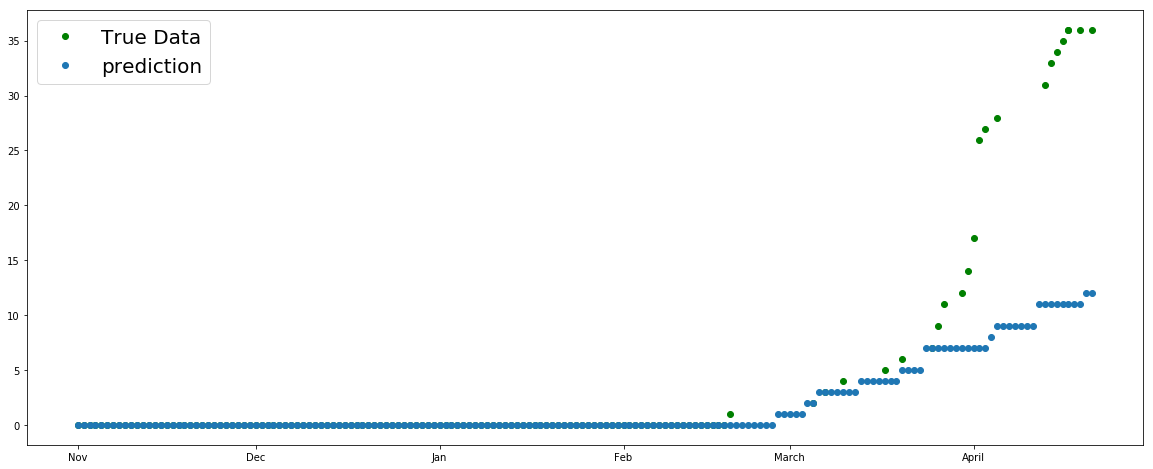

In [266]:
# datetime.strptime(d1, "%Y-%m-%d")
plt.figure(figsize = (20,8))
plt.plot(summary_time, summary_cum,  'o', color = 'green', label = 'True Data')
plt.plot(inter_t, inter_cum, 'o', label = 'prediction')
plt.legend(fontsize = 20)
# plt.xlim([0, Rec_F04[-1]+4])
# plt.ylim([0,100])
plt.xticks([0,30, 30+31, 30+31+31, 30+31+31+28, 30+31+31+28+31
           ], ['Nov','Dec', 'Jan', 'Feb', 'March', 'April'])

([<matplotlib.axis.XTick at 0x7f9855df3b38>,
 <a list of 6 Text xticklabel objects>)

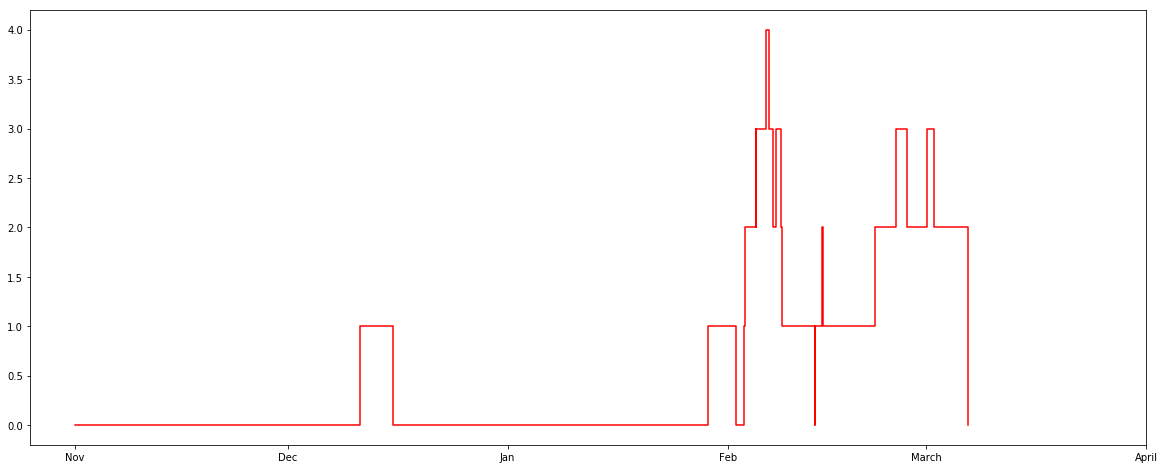

In [598]:
infections = np.array(infections).flatten()
# len(infections)
# N = sum(Input_H)
plt.figure(figsize = (20,8))
# # plt.plot(SEIHRt, SEIHRr/Nn,c='blue', label = 'removed')
plt.plot(time2, infections,c='r', label = 'infected')
# # plt.plot(manhts, manhhs/Nn,c='magenta', label = 'hospital')

# # plt.plot(manhts,manhrs/Nn, c='yellowgreen',label = 'susceptible')
# # plt.plot(manhts,manhis,c= 'r', label = 'infected')
# plt.legend(fontsize = 20)
# # plt.xlim([120,150])
plt.xticks([0,30, 30+31, 30+31+31, 30+31+31+28, 30+31+31+28+31
           ], ['Nov','Dec', 'Jan', 'Feb', 'March', 'April'])

# ABC

In [268]:
N = 50
tol = 76
t = 0 
θ = []

β1, ɛ1, σ1, μ11,μ21 =  [np.random.uniform(0.1,1, N), np.random.uniform(0,0.00001, N),
                     1/np.random.uniform(1,30, N), 1/np.random.uniform(1, 40, N),
                     1/np.random.uniform(1,40, N)]
#     print(np.array([β1, ɛ1, p1 ]))

θ = [np.array([β1, ɛ1, σ1, μ11, μ21]).T]
# print(θ[0][:,0])
t = 1
θ_t = []
tols = []
tols.append(tol)
error = []
while t< 6:
    r_β = np.random.randint(0, N-1)
    r_ϵ = np.random.randint(0,N-1)
    r_σ= np.random.randint(0,N-1)
    r_μ1 = np.random.randint(0,N-1)
    r_μ2 = np.random.randint(0,N-1)
    δ = np.random.uniform(0, 1e-3)
    βt, ɛt, σt, μ1t, μ2t = θ[t-1][:,0][r_β] +δ, θ[t-1][:,1][r_ϵ] +δ,θ[t-1][:,2][r_σ] + δ, θ[t-1][:,3][r_μ1] +δ, θ[t-1][:,4][r_μ2] +δ

    M =gillespieSEIR_season(Input_H, βt, μ1t,μ2t,σt,ɛt)
    time = [] #make results of M a step function
    cuminf = [] #steps
    for ind, x in enumerate(M[0]):
        if ind < len(M[0])-1:
            time.append((M[0][ind], M[0][ind+1]))
            cuminf.append((M[3][ind], M[3][ind]))
        else:
            time.append((M[0][ind], M[0][ind]))
            cuminf.append((M[3][ind], M[3][ind]))
    time = np.array(time).flatten()
    cuminf = np.array(cuminf).flatten()
    max_inf = max(cuminf)
    max_time = math.ceil(max(time))
#     print(max_inf, max_time, βt, ɛt)
    

    summary_time = summary[0]
#         print(summary_time, max(summary_time[0]), max_time)
    summary_cum = summary[1]
    if max_time> max(summary_time):
        length1 =  np.arange(max(summary_time), max_time +1, 3)
        summary_time = np.append(summary_time, length1)
#         print(summary_time, len( length1))
        summary_cum = np.append(summary_cum, max(summary[1])*np.ones(len(length1 )))
#         print(summary_cum)
    if max_time < max(summary_time):
        length2 = np.arange(max_time, max(summary_time)+1, 3)
        time = np.append(time,length2)
        cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))
        
    inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
    inter_cum = np.interp(inter_t, time,cuminf) #daily steps
    
#         print(summary_time, summary_cum)
#     print(np.linalg.norm(summary_cum-inter_cum[summary_time]), βt, ɛt, pt)
    if np.linalg.norm(summary_cum-inter_cum[summary_time]) <tol:
        θ_t.append(np.array([βt, ɛt, σt, μ1t, μ2t]))
        print(len(θ_t), t, tol, np.linalg.norm(summary_cum-inter_cum[summary_time]))
#             θ_t = np.array(θ_t)
#             print(θ_t)
        error.append(np.linalg.norm(summary_cum-inter_cum[summary_time]))
    if len(θ_t) == N:
        tol = np.median(error)
        tols.append(tol)
        θ_t = np.array(θ_t)
        print(θ_t)
        θ.append(θ_t)
        t +=1 
        θ_t = []
        error = []

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


1 1 76 75.27283706623525
2 1 76 61.08191221630181
3 1 76 75.92759709091287
4 1 76 67.83804242458652
5 1 76 72.98630008433089
6 1 76 73.80379394042016
7 1 76 56.639209034025185
8 1 76 74.47818472546173
9 1 76 64.60650122085238
10 1 76 72.3325652801005
11 1 76 59.270566050949775
12 1 76 60.8276253029822
13 1 76 73.5255057786072
14 1 76 68.59300255857006
15 1 76 66.36264009214823
16 1 76 74.14175611623992
17 1 76 70.74602462329597
18 1 76 71.4142842854285
19 1 76 71.26008700527947
20 1 76 70.59745037889117
21 1 76 73.08214556237385
22 1 76 61.98386886924694
23 1 76 60.663003552412405
24 1 76 75.58438992278762
25 1 76 71.01408311032397
26 1 76 75.0066663703967
27 1 76 75.66372975210778
28 1 76 75.25290692059676
29 1 76 66.52067347825036
30 1 76 74.14175611623992
31 1 76 71.56814934033156
32 1 76 70.65408693062278
33 1 76 72.93833011524188
34 1 76 73.90534486760751
35 1 76 72.02083032012335
36 1 76 68.98550572402873
37 1 76 66.84309986827361
38 1 76 66.89544080129826
39 1 76 65.306967469022

1 3 66.86925779321945 64.24173098539609
2 3 66.86925779321945 64.4437739428721
3 3 66.86925779321945 64.5445582524197
4 3 66.86925779321945 60.423505360083176
5 3 66.86925779321945 66.81317235396027
6 3 66.86925779321945 63.25345840347388
7 3 66.86925779321945 63.49803146555018
8 3 66.86925779321945 64.0
9 3 66.86925779321945 66.53570470055908
10 3 66.86925779321945 66.85057965343307
11 3 66.86925779321945 47.34976240700686
12 3 66.86925779321945 66.6783323126786
13 3 66.86925779321945 59.89991652748775
14 3 66.86925779321945 62.00806399170998
15 3 66.86925779321945 63.99218702310463
16 3 66.86925779321945 63.788713735268246
17 3 66.86925779321945 64.99230723708769
18 3 66.86925779321945 62.960304954788775
19 3 66.86925779321945 65.90144156238162
20 3 66.86925779321945 62.42595614005443
21 3 66.86925779321945 60.93439094632849
22 3 66.86925779321945 64.68384651518491
23 3 66.86925779321945 59.08468498688979
24 3 66.86925779321945 65.07687761409578
25 3 66.86925779321945 65.498091575251

1 5 61.73316131896597 54.735728733616035
2 5 61.73316131896597 61.27805479941412
3 5 61.73316131896597 59.87486951969081
4 5 61.73316131896597 61.171888968708494
5 5 61.73316131896597 56.515484603779164
6 5 61.73316131896597 54.881690936048976


KeyboardInterrupt: 

In [269]:
np.save('theta_Season_F04_3', θ)
np.save('tols_Season_F04_3', tols)

In [126]:
# np.save('theta_SEIR', θ)
# np.save('tols_SEIR', tols)
len(θ[0][:,1])

50

/home/emma/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


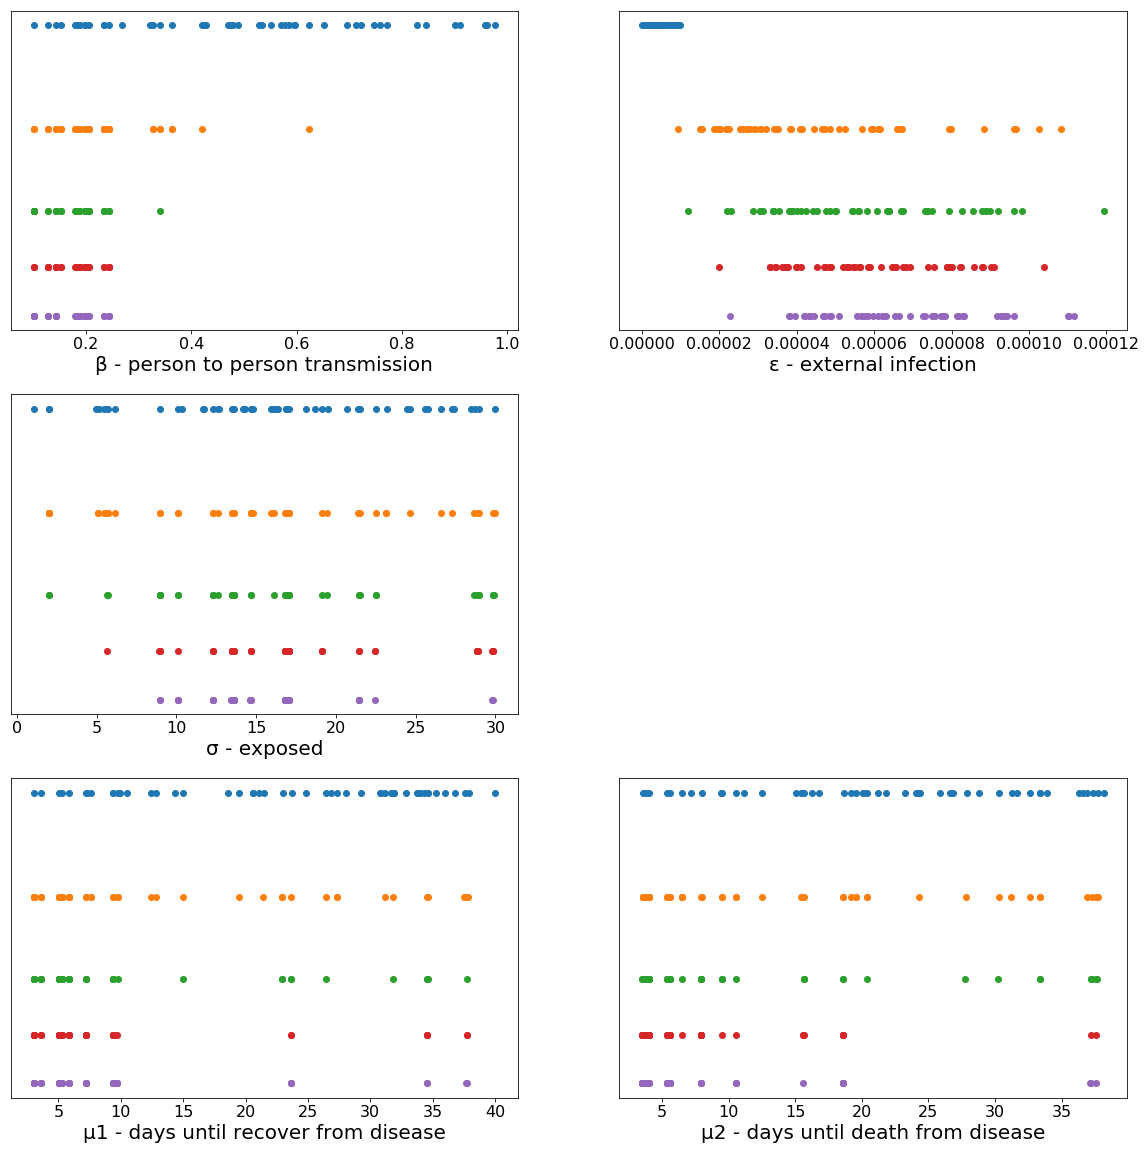

In [270]:
plt.figure(figsize = (20,20))
# tol = 
for i in range(5):
    plt.subplot(3,2,1)
    plt.plot(θ[i][:,0], tols[i]*np.ones(50), 'o' )
    plt.xlabel('β - person to person transmission', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)
    
    plt.subplot(3,2,2)
    plt.plot(θ[i][:,1], tols[i]*np.ones(50), 'o' )
    plt.xlabel('ɛ - external infection', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,3)
    plt.plot([1/a for a in θ[i][:,2]], tols[i]*np.ones(50), 'o' )
    plt.xlabel('σ - exposed', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,5)
    plt.plot([1/b for b in θ[i][:,3]] , tols[i]*np.ones(50), 'o' )
    plt.xlabel('μ1 - days until recover from disease', fontsize = 20)
    plt.yticks([])        
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,6)
    plt.plot([1/b for b in θ[i][:,4]] , tols[i]*np.ones(50), 'o' )
    plt.xlabel('μ2 - days until death from disease', fontsize = 20)
    plt.yticks([])        
    plt.xticks(fontsize = 16)
    
#     tol -=1

/home/emma/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 9 Text xticklabel objects>)

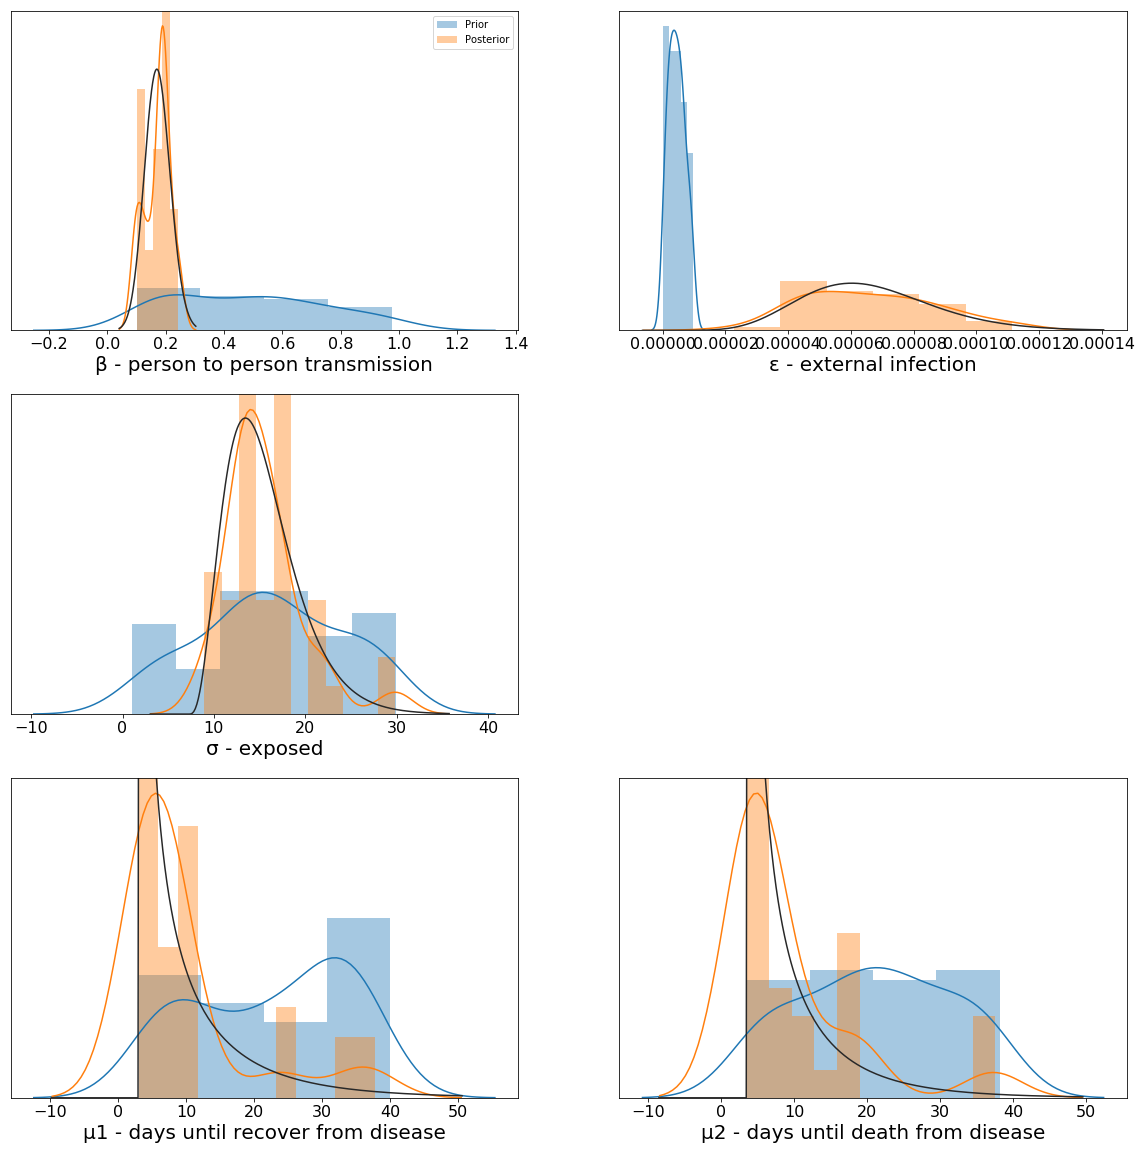

In [273]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
#     plt.plot(θ[i][:,0], tols[i]*np.ones(50), 'o' )
sns.distplot(θ[0][:,0],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[4][:,0],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('β - person to person transmission', fontsize = 20)
plt.yticks([])
plt.legend()
plt.xticks(fontsize = 16)

plt.subplot(3,2,2)
#     plt.plot(θ[i][:,1], tols[i]*np.ones(50), 'o' )
sns.distplot(θ[0][:,1],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[4][:,1],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('ɛ - external infection', fontsize = 20)
plt.yticks([])
plt.xticks(fontsize = 16)

plt.subplot(3,2,3)
#     plt.plot([1/a for a in θ[i][:,2]], tols[i]*np.ones(50), 'o' )
sns.distplot([1/a for a in θ[0][:,2]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[4][:,2]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('σ - exposed', fontsize = 20)
plt.yticks([])
plt.xticks(fontsize = 16)

plt.subplot(3,2,5)
sns.distplot([1/a for a in θ[0][:,3]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[4][:,3]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.plot([1/b for b in θ[i][:,3]] , tols[i]*np.ones(50), 'o' )
plt.xlabel('μ1 - days until recover from disease', fontsize = 20)
plt.yticks([])        
plt.xticks(fontsize = 16)

plt.subplot(3,2,6)
#     plt.plot([1/b for b in θ[i][:,4]] , tols[i]*np.ones(50), 'o' )
sns.distplot([1/a for a in θ[0][:,4]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[4][:,4]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('μ2 - days until death from disease', fontsize = 20)
plt.yticks([])        
plt.xticks(fontsize = 16)

# Test it

In [275]:
a_β, loc_β, scale_β = stats.gamma.fit(θ[4][:,0])
a_ϵ, loc_ϵ, scale_ϵ = stats.gamma.fit(θ[4][:,1])
a_σ, loc_σ, scale_σ = stats.gamma.fit([1/a for a in θ[4][:,2]])
a_μ1, loc_μ1, scale_μ1 = stats.gamma.fit([1/a for a in θ[4][:,3]])
a_μ2, loc_μ2, scale_μ2 = stats.gamma.fit([1/a for a in θ[4][:,4]])

In [276]:
timing = []
cumulative = []
for k in range(1000):
    beta = stats.gamma.rvs( a_β, loc_β, scale_β)
    mu1 = 1/stats.gamma.rvs( a_μ1, loc_μ1, scale_μ1)
    mu2 = 1/stats.gamma.rvs( a_μ2, loc_μ2, scale_μ2)
    epsilon = stats.gamma.rvs( a_ϵ, loc_ϵ, scale_ϵ)
    sigma = 1/stats.gamma.rvs( a_σ, loc_σ, scale_σ)
    M=gillespieSEIR_season(Input_H, beta, mu1,mu2,
                          sigma,epsilon)
#     r_β = np.random.randint(0, 49)
#     r_ϵ = np.random.randint(0,49)
#     r_σ = np.random.randint(0,49)
#     r_μ1 = np.random.randint(0,49)
#     r_μ2 = np.random.randint(0,49)
#     M=gillespieSEIR(parameters[0], betas[r_β], mus1[r_μ1],mus2[r_μ2],
#                           sigmas[r_σ],eps[r_ϵ],  parameters[6])
    time = [] #make results of M a step function
    cuminf = [] #steps
    for ind, x in enumerate(M[0]):
        if ind < len(M[0])-1:
            time.append((M[0][ind], M[0][ind+1]))
            cuminf.append((M[3][ind], M[3][ind]))
        else:
            time.append((M[0][ind], M[0][ind]))
            cuminf.append((M[3][ind], M[3][ind]))
    time = np.array(time).flatten()
    cuminf = np.array(cuminf).flatten()
    max_inf = max(cuminf)
    max_time = math.ceil(max(time))
    #     print(max_inf, max_time, βt, ɛt)


    summary_time = Rec_F04
    #         print(summary_time, max(summary_time[0]), max_time)
    summary_cum = Data_F04['CumsumInf'].values
    if max_time> max(summary_time):
        length1 =  np.arange(max(summary_time), max_time +1, 1)
        summary_time = np.append(summary_time, length1)
    #         print(summary_time, len( length1))
        summary_cum = np.append(summary_cum, max( Data_F04['CumsumInf'].values)*np.ones(len(length1 )))
    #         print(summary_cum)
    if max_time < max(summary_time):
        length2 = np.arange(max_time, max(summary_time)+1, 1)
        time = np.append(time,length2)
        cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))

    inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
    inter_cum = np.interp(inter_t, time,cuminf) #daily steps
    timing.append(inter_t)
    cumulative.append(inter_cum)
    #         print(summary_time, summary_cum)
#     print(np.linalg.norm(summary_cum-inter_cum[summary_time]),  betas[r_β], mus1[r_μ1],mus2[r_μ2],
#                           sigmas[r_σ],eps[r_ϵ])
    

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


(0, 100)

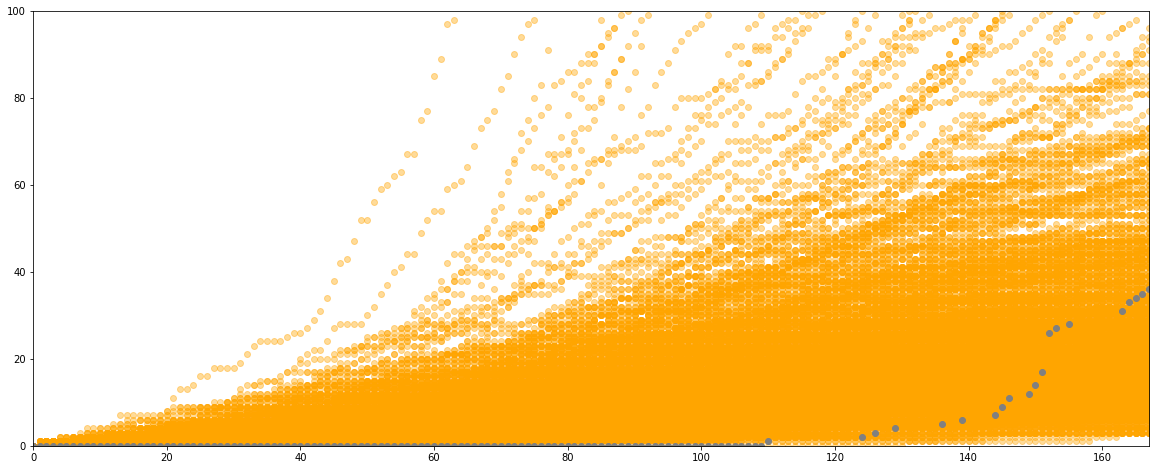

In [277]:
len_outbreak = Rec_F04[-1]
plt.figure(figsize = (20,8))
Num_sim = 1000
for j in range(Num_sim):
    plt.plot(timing[j], cumulative[j], 'o', color = 'orange', alpha = 0.4)

plt.plot(summary[0], summary[1], 'o', color = 'grey')
plt.xlim([0,len_outbreak])
plt.ylim([0,100])

In [278]:
mat = np.zeros(shape=(Num_sim, len_outbreak+1))
cumulative = np.array(cumulative)

In [279]:
for k in range(Num_sim):
    mat[k,:] = cumulative[k][:len_outbreak+1]

In [280]:
np.mean(mat, axis = 0)
import matplotlib.lines as mlines

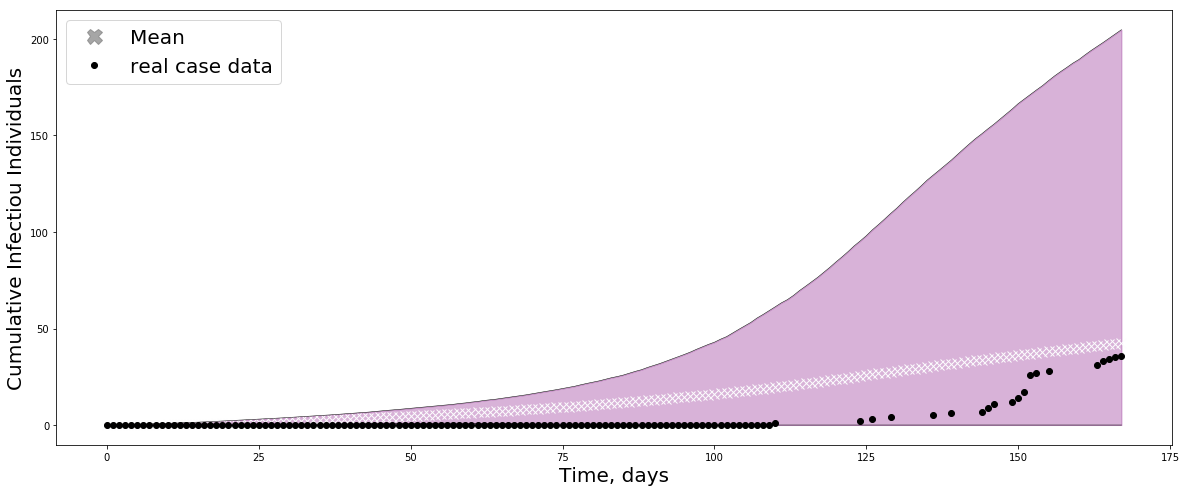

In [281]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(range(len_outbreak+1), np.mean(mat, axis = 0), 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(len_outbreak+1), (np.mean(mat, axis = 0)+np.std(mat, axis = 0)), color ='k', lw=0.5)
plt.plot(range(len_outbreak+1), np.maximum((np.mean(mat, axis = 0)-np.std(mat, axis = 0)),0),color ='k', lw=0.5)
plt.fill_between(range(len_outbreak+1),  (np.mean(mat, axis = 0)+np.std(mat, axis = 0)), np.maximum((np.mean(mat, axis = 0)-np.std(mat, axis = 0)),0), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary[0], summary[1], 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', alpha = 0.7, marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mean')
plt.legend(handles=[blue_line, true], fontsize = 20)
# leg.legendHandles[0].set_color('red')
# LH = leg.legendHandles
# LH[0].set_color('red')  # Works
# LH[0].set_linewidth(18)
# LH[1].set_color('y') # No change


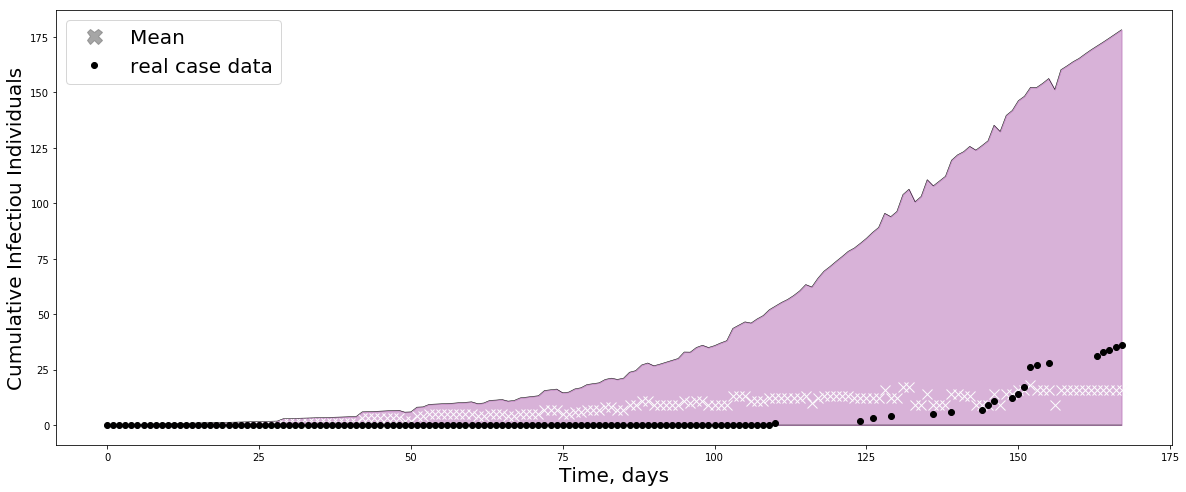

In [282]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(range(len_outbreak+1), stats.mode(mat, axis = 0)[0][0], 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(len_outbreak+1), (stats.mode(mat, axis = 0)[0][0]+np.std(mat, axis = 0)), color ='k', lw=0.5)
plt.plot(range(len_outbreak+1), np.maximum((stats.mode(mat, axis = 0)[0][0]-np.std(mat, axis = 0)),0),color ='k', lw=0.5)
plt.fill_between(range(len_outbreak+1),  (stats.mode(mat, axis = 0)[0][0]+np.std(mat, axis = 0)), np.maximum((stats.mode(mat, axis = 0)[0][0]-np.std(mat, axis = 0)),0), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary[0], summary[1], 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', alpha = 0.7, marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mean')
plt.legend(handles=[blue_line, true], fontsize = 20)
# leg.legendHandles[0].set_color('red')

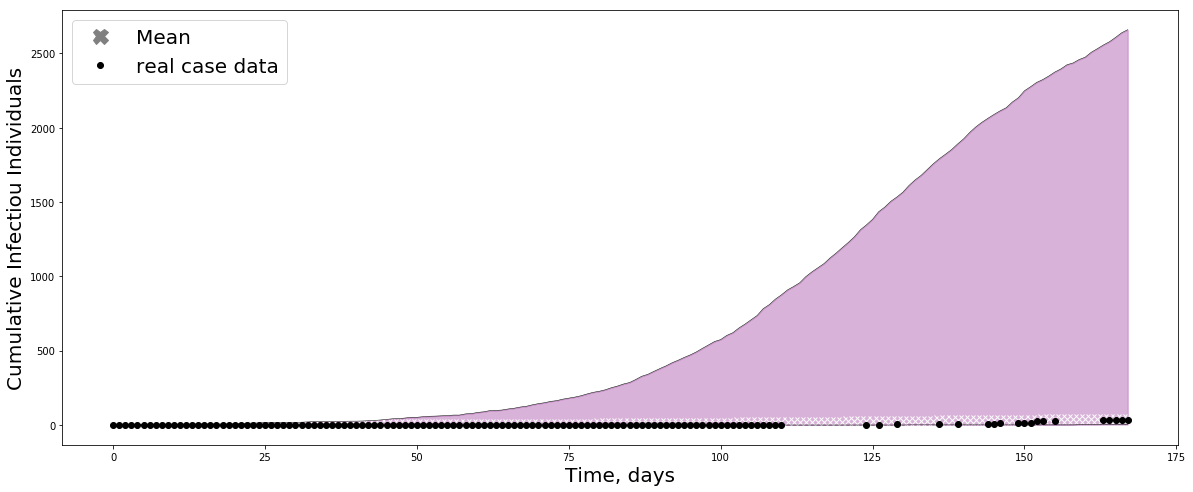

In [283]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(range(len_outbreak+1), np.mean(mat, axis = 0), 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(len_outbreak+1), (np.max(mat, axis = 0)), color ='k', lw=0.5)
plt.plot(range(len_outbreak+1), np.min(mat, axis = 0),color ='k', lw=0.5)
plt.fill_between(range(len_outbreak+1),  (np.max(mat, axis = 0)), (np.min(mat, axis = 0)), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary[0], summary[1], 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mean')
plt.legend(handles=[blue_line, true], fontsize = 20)

In [284]:
def returnerror(timestep, cum, sumstat1, sumstat2):
    time = [] #make results of M a step function
    cuminf = [] #steps
    for ind, x in enumerate(timestep):
        if ind < len(timestep)-1:
            time.append((timestep[ind], timestep[ind+1]))
            cuminf.append((cum[ind], cum[ind]))
        else:
            time.append((timestep[ind], timestep[ind]))
            cuminf.append((cum[ind], cum[ind]))
    time = np.array(time).flatten()
    cuminf = np.array(cuminf).flatten()
    max_inf = max(cuminf)
    max_time = math.ceil(max(time))
#     print(max_inf, max_time, βt, ɛt)
    

    summary_time = sumstat1
#         print(summary_time, max(summary_time[0]), max_time)
    summary_cum = sumstat2
    if max_time> max(summary_time):
        length1 =  np.arange(max(summary_time), max_time +1, 3)
        summary_time = np.append(summary_time, length1)
#         print(summary_time, len( length1))
        summary_cum = np.append(summary_cum, max(sumstat2)*np.ones(len(length1 )))
#         print(summary_cum)
    if max_time < max(summary_time):
        length2 = np.arange(max_time, max(summary_time)+1, 1)
        time = np.append(time,length2)
        cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))
        
    inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
    inter_cum = np.interp(inter_t, time,cuminf) 
    return np.linalg.norm(summary_cum-inter_cum[summary_time]), inter_t, inter_cum

125.85203824332764

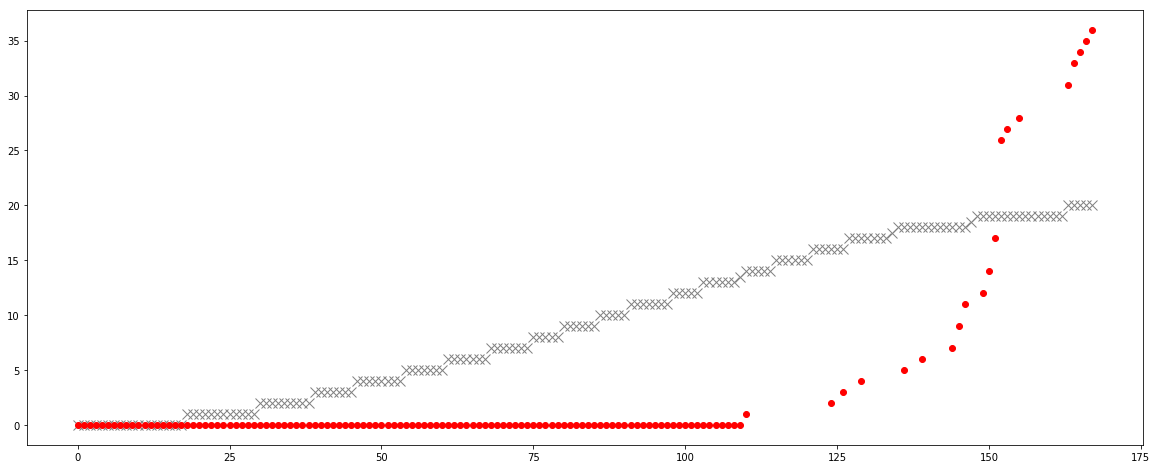

In [285]:
plt.figure(figsize = (20,8))
plt.plot(range(len_outbreak +1), np.median(mat, axis = 0), 'x', markersize = 10,linewidth = 6, color = 'grey', label = 'Mean')

plt.plot(summary[0], summary[1], 'o', color = 'red')
# len()
error = returnerror(range(len_outbreak+1), np.mean(mat, axis = 0), summary[0], summary[1])[0]
error